In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
dtypes = {
    'listing_id': 'int64',
    'date': 'object',
    'available': 'object',
    'price': 'object',
    'adjusted_price': 'object',
    'minimum_nights': 'object',
    'maximum_nights': 'object'
}

In [8]:
listin   = pd.read_csv('listings.csv')
review   = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv',dtype=dtypes)

In [14]:
listin.shape

(37765, 75)

In [12]:
listin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

In [16]:
##### 1. Price
listin['price'] = listin['price'].replace({r'\$':''}, regex=True).replace({r'\,':''}, regex=True)
listin['price'] = pd.to_numeric(listin['price'])

In [30]:
listin['price'].unique()

array([       nan, 2.1500e+02, 8.1000e+01, 6.5000e+01, 2.0500e+02,
       2.9000e+02, 1.7000e+02, 1.7500e+02, 9.0000e+01, 7.3000e+01,
       1.8500e+02, 1.2000e+02, 1.3600e+02, 1.1500e+02, 2.3100e+02,
       9.6000e+01, 1.3500e+02, 1.2900e+02, 3.0000e+02, 2.3000e+02,
       5.0000e+02, 1.4600e+02, 2.0000e+02, 1.1000e+02, 1.0500e+02,
       8.5000e+01, 4.5000e+02, 2.2000e+02, 1.0000e+02, 1.5000e+02,
       1.0700e+02, 1.2100e+02, 7.6000e+01, 9.0000e+02, 2.4800e+02,
       1.5400e+02, 1.3900e+02, 7.8000e+01, 7.5000e+02, 9.8000e+01,
       6.0000e+01, 7.5000e+01, 9.5000e+01, 1.9100e+02, 1.3000e+02,
       3.5000e+02, 1.1600e+02, 1.2500e+02, 1.5700e+02, 7.9000e+01,
       2.6900e+02, 4.6000e+01, 2.6200e+02, 8.9000e+01, 2.8500e+02,
       1.1400e+02, 1.9000e+02, 3.4900e+02, 1.0300e+02, 1.5800e+02,
       2.2500e+02, 1.6000e+02, 1.6500e+02, 7.0000e+01, 1.2400e+02,
       2.2100e+02, 4.9000e+01, 7.7000e+01, 1.8400e+02, 2.7500e+02,
       8.0000e+02, 1.4000e+02, 1.7100e+02, 6.2000e+01, 2.7900e

In [28]:
listin['price'].unique()
media = listin['price'].mean()
mediana = listin['price'].median()
moda = listin['price'].mode()
print("""
    Media: %d
    Mediana: %d
    Moda: %d
    """ % (media,mediana,moda))
#p90 = df["nota"].quantile(0.9)



    Media: 221
    Mediana: 150
    Moda: 150
    


/var/folders/v6/rnn2nr_n741cccswm1kvr59r0000gn/T/ipykernel_8687/4124182944.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("""


[]

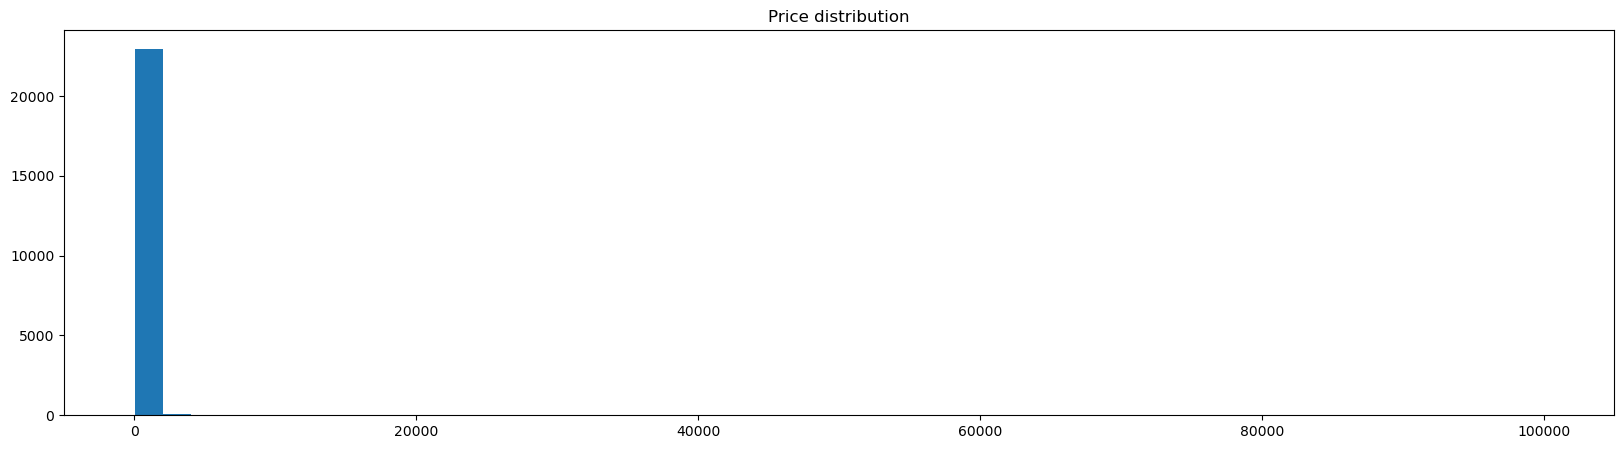

In [24]:
plt.figure(figsize=(20, 5))
plt.hist(listin['price'], bins=50)
plt.title("Price distribution")
plt.plot()

In [18]:
listin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20240705150938,2024-07-06,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,a few days or more,43%,21%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",NaN,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,13,30,60,300,2024-07-06,49,0,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,NaN,f,3,3,0,0,0.28
1,5136,https://www.airbnb.com/rooms/5136,20240705150938,2024-07-05,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,5.0,"['email', 'phone']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5,1.5 baths,2.0,2.0,"[""Smoke alarm"", ""Heating"", ""Dryer"", ""Bed linen...",215.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,2,11,11,71,2024-07-05,4,1,0,2014-01-02,2023-08-20,4.75,4.75,4.50,5.00,5.00,4.75,4.75,NaN,t,1,1,0,0,0.03
2,6848,https://www.airbnb.com/rooms/6848,20240705150938,2024-07-06,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,Allen & Irina,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/15991/profile...,https://a0.muscache.com/im/users/15991/profile...,Williamsburg,1.0,1.0,"['email', 'phone']",t,t,NaN,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,1.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",81.0,30,730,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,5,5,193,2024-07-06,193,3,0,2009-05-25,2024-05-18,4.58,4.59,4.86,4.85,4.80,4.68,4.57,NaN,f,1,1,0,0,1.05
3,6872,https://www.airbnb.com/rooms/6872,20240705150938,2024-07-05,c

In [10]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940310 entries, 0 to 940309
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     940310 non-null  int64 
 1   id             940310 non-null  int64 
 2   date           940310 non-null  object
 3   reviewer_id    940310 non-null  int64 
 4   reviewer_name  940307 non-null  object
 5   comments       940084 non-null  object
dtypes: int64(3), object(3)
memory usage: 43.0+ MB


In [11]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13783864 entries, 0 to 13783863
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  object
 6   maximum_nights  object
dtypes: int64(1), object(6)
memory usage: 736.1+ MB


In [116]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2024-07-06,t,$225.00,NaN,30,1125
1,2595,2024-07-07,t,$225.00,NaN,30,1125
2,2595,2024-07-08,t,$225.00,NaN,30,1125
3,2595,2024-07-09,t,$225.00,NaN,30,1125
4,2595,2024-07-10,t,$225.00,NaN,30,1125


In [53]:
calendar['price'] = calendar['price'].replace({r'\$':''}, regex=True).replace({r'\,':''}, regex=True)
calendar['price'] = pd.to_numeric(calendar['price'])

In [38]:
#lintin = pd.merge(listin, review, left_on='id',right_on='listing_id', how='left',suffixes=('_listin', '_review'))

In [55]:
listin = pd.merge(listin,calendar , left_on='id',right_on='listing_id', how='left',suffixes=('_listin', '_calendar'))

In [59]:
listin[listin['available']=='t'].groupby('id')['available'].count().sort_values(ascending=[False])

id
699081955951522189    365
608484199640101037    365
22028307              365
846569499654554906    365
22064262              365
                     ... 
33835470                1
33852604                1
691912167824183117      1
53763914                1
899029977125048428      1
Name: available, Length: 25225, dtype: int64

In [65]:
listin[listin['id']==699081955951522189]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_listin,minimum_nights_listin,maximum_nights_listin,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_calendar,adjusted_price,minimum_nights_calendar,maximum_nights_calendar
9181577,699081955951522189,https://www.airbnb.com/rooms/699081955951522189,20240705150938,2024-07-06,city scrape,"Blueground | Midtown East, doorman, nr UN",Show up and start living from day one in Midto...,This furnished apartment is located in Murray ...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"New York, NY","We’re Blueground, a global proptech company wi...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/d0ad9...,https://a0.muscache.com/im/pictures/user/d0ad9...,Cambridge,4641.0,4935.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.751471,-73.971415,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Smoke alarm"", ""Heating"", ""Dryer \u2013 In bu...",279.0,31,1125,31.0,365.0,1125.0,1125.0,36.5,1125.0,NaN,t,30,60,90,365,2024-07-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,842,842,0,0,NaN,6.990820e+17,2024-07-06,t,279.0,NaN,31,1125
9181578,699081955951522189,https://www.airbnb.com/rooms/699081955951522189,20240705150938,2024-07-06,city scrape,"Blueground | Midtown East, doorman, nr UN",Show up and start living from day one in Midto...,This furnished apartment is located in Murray ...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"New York, NY","We’re Blueground, a global proptech company wi...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/d0ad9...,https://a0.muscache.com/im/pictures/user/d0ad9...,Cambridge,4641.0,4935.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.751471,-73.971415,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Smoke alarm"", ""Heating"", ""Dryer \u2013 In bu...",279.0,31,1125,31.0,365.0,1125.0,1125.0,36.5,1125.0,NaN,t,30,60,90,365,2024-07-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,842,842,0,0,NaN,6.990820e+17,2024-07-07,t,279.0,NaN,31,1125
9181579,699081955951522189,https://www.airbnb.com/rooms/699081955951522189,20240705150938,2024-07-06,city scrape,"Blueground | Midtown East, doorman, nr UN",Show up and start living from day one in Midto...,This furnished apartment is located in Murray ...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"New York, NY","We’re Blueground, a global proptech company wi...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/d0ad9...,https://a0.musca

In [37]:
listin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_listin,minimum_nights_listin,maximum_nights_listin,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_calendar,adjusted_price,minimum_nights_calendar,maximum_nights_calendar
0,2595,https://www.airbnb.com/rooms/2595,20240705150938,2024-07-06,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,a few days or more,43%,21%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",NaN,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,13,30,60,300,2024-07-06,49,0,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,NaN,f,3,3,0,0,0.28,2595.0,2024-07-06,t,$225.00,NaN,30,1125
1,2595,https://www.airbnb.com/rooms/2595,20240705150938,2024-07-06,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,a few days or more,43%,21%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",NaN,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,13,30,60,300,2024-07-06,49,0,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,NaN,f,3,3,0,0,0.28,2595.0,2024-07-07,t,$225.00,NaN,30,1125
2,2595,https://www.airbnb.com/rooms/2595,20240705150938,2024-07-06,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,a few days or more,43%,21%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1